### Домашнее задание № 1 по курсу "Прикладные методы математической статистики
Баранова Анастасия Андреевна, группа БПИ196

Вариант 1

In [1]:
import numpy as np
import scipy.stats as st

In [2]:
# Данные выборки:
data = np.array([31, 12, 28, 33, 23, 34, 9, 18, 26, 25, 18, 33, 12, 28, 11, 22, 32, 26, 22, 29])

#### a) Найдем доверительный интервал уровня надежности 0,9 для средней продолжительности вскармливания, считая распределение признака нормальным.

In [13]:
mean = data.mean()     # 23.6
sem = st.sem(data)     # 1.7776388834631176

st.t.interval(alpha=0.9, df=data.shape[0] - 1, loc=mean, scale=sem)

(20.526226279567716, 26.673773720432287)

#### б) Построим график «квантиль-квантиль».

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(8,6)})

Определим необходимые уровни квантилей для построения графика. 

quantiles = [1/(n+1), 2/(n+1), ..., n/(n+1)].

In [153]:
quantiles = np.array(range(1, data.shape[0] + 1)) / (data.shape[0] + 1)
print(quantiles)

[0.04761905 0.0952381  0.14285714 0.19047619 0.23809524 0.28571429
 0.33333333 0.38095238 0.42857143 0.47619048 0.52380952 0.57142857
 0.61904762 0.66666667 0.71428571 0.76190476 0.80952381 0.85714286
 0.9047619  0.95238095]


Найдем выборочные квантили.

In [31]:
sample_quantiles = np.quantile(a=data, q=quantiles)
print(sample_quantiles)

[10.80952381 11.80952381 12.         15.71428571 18.         19.71428571
 22.         22.23809524 23.28571429 25.04761905 25.95238095 26.
 27.52380952 28.         28.57142857 29.95238095 31.38095238 32.28571429
 33.         33.0952381 ]


Найдем квантили, соответствующие нормальному распределению с математическим ожиданием data.mean() (выборочное среднее) и среднеквадратическим отклонением, равным data.std(ddof=1) (несмещенное выборочное среднеквадратическое отклонение).

In [32]:
norm_quantiles = np.vectorize(lambda x: st.norm.ppf(x, loc=data.mean(), scale=data.std(ddof=1)))(quantiles)
print(norm_quantiles)

[10.33655234 13.1922907  15.11298219 16.63480211 17.93618991 19.10079585
 20.1757857  21.19135308 22.16892996 23.12525845 24.07474155 25.03107004
 26.00864692 27.0242143  28.09920415 29.26381009 30.56519789 32.08701781
 34.0077093  36.86344766]


Построим график "квантиль-квантиль".

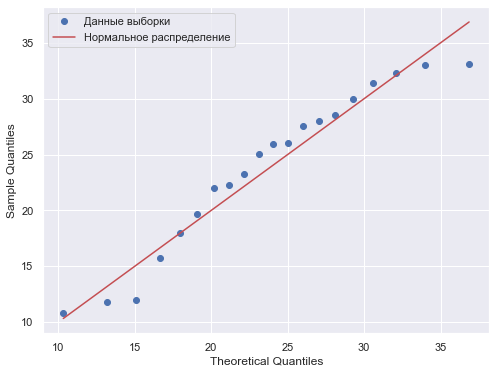

In [34]:
plt.plot(norm_quantiles, sample_quantiles, 'o')
plt.plot(norm_quantiles, norm_quantiles, 'r')

plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

plt.legend(['Данные выборки', 'Нормальное распределение']) 
plt.show()

Можно сделать вывод, что распределение времени вскармливания соответствует нормальному закону.

#### в) Рассчитаем 90% доверительный интервал для средней продолжительности вскармливания, сгенерировав 1000 перевыборок.

Сгенерируем 1000 предвыборок и для каждой определим среднее значение.

In [148]:
means = np.array([np.random.choice(data, size=data.shape[0]).mean() for i in range(1000)])
#print(means) # Вывод достаточно объемный, для проверки значений можно раскомментировать строку

Определим квантили порядков 5% и 95%. Они и будут границами искомого доверительного интервала.

In [149]:
interval = np.quantile(means, 0.05), np.quantile(means, 0.95)

print(interval)

(20.85, 26.45)


#### г) Построим гистограмму для полученных 1000 средних значений. 

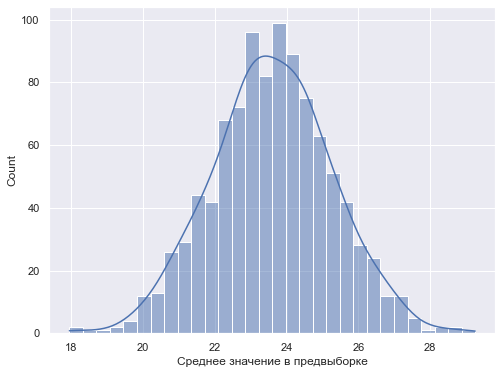

In [152]:
sns.histplot(data=means, bins=30, kde=True)
plt.xlabel('Среднее значение в предвыборке')
plt.show()

Можем сделать вывод, что распределение среднего в перевыборках действительно похоже на нормальное.